# Regressão

Material derivado do curso de Machine Learning da IBM: <br>
https://www.coursera.org/learn/machine-learning-with-python

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [ ]:
!wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"


--2022-04-19 20:04:04--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumptionCo2.csv’

FuelConsumptionCo2. 100%[===================>]  70.93K   280KB/s    in 0.3s    

2022-04-19 20:04:05 (280 KB/s) - ‘FuelConsumptionCo2.csv’ saved [72629/72629]



## FuelConsumption.csv

O dataset que você baixou contém dados de consumo de combustível de diferentes modelos de veículos a partir das quais é possíveis estimar a taxa de emissão de CO2. A seguir uma breve descrição de cada atributo.

    MODELYEAR e.g. 2014
    MAKE e.g. Acura
    MODEL e.g. ILX
    VEHICLE CLASS e.g. SUV
    ENGINE SIZE e.g. 4.7
    CYLINDERS e.g 6
    TRANSMISSION e.g. A6
    FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
    FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
    FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
    CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0 #variável objetivo


A seguir utilizamos as seguintes funções:
- `df.head()`: apresenta as primeiras 5 amostras da base e todos os seus atributos.
- `df.describe()`: Apresenta estastísticas gerais de cada atributo.

In [ ]:
df = pd.read_csv("FuelConsumptionCo2.csv")
display(df.head())
df.describe()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


## Q1. Regressão Simples

A variável que gostaríamos de prever é a `CO2EMISSIONS`. Faremos nessa primeira atividade uma regressão simples, onde a partir de uma única variável, vamos modelar a predição da variável objetivo.

- Plot o espalhamento de cada uma das variáveis em relação à emissão de CO2 (função scatter do matplotlib, `plt.scatter`)
- Plot também a matriz de correlação (`df.corr`)
- Selecione a variável mais correlacionada para alimentar nosso modelo no passo seguinte.
> Note que as bibliotecas necessárias já foram importadas no início deste documento.

Showing chart for MODELYEAR


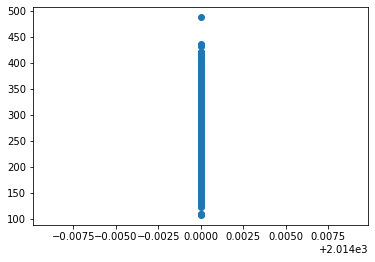

Showing chart for MAKE


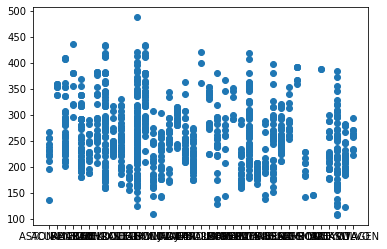

Showing chart for MODEL


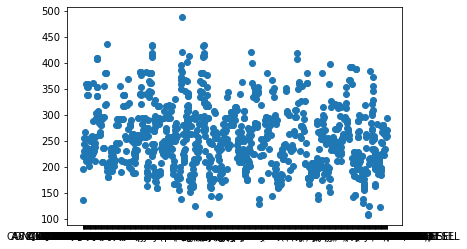

Showing chart for VEHICLECLASS


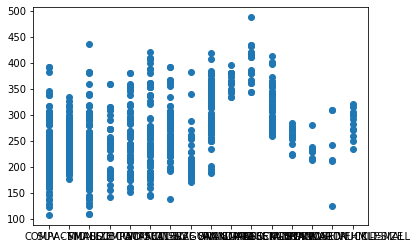

Showing chart for ENGINESIZE


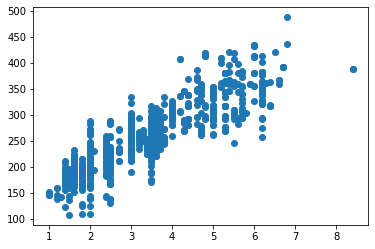

Showing chart for CYLINDERS


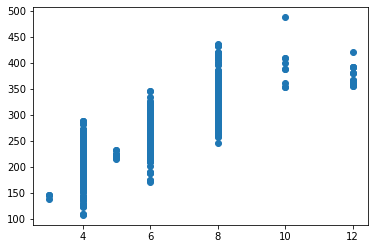

Showing chart for TRANSMISSION


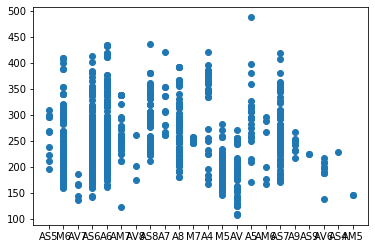

Showing chart for FUELTYPE


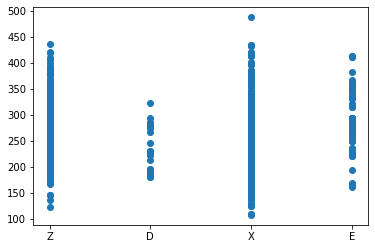

Showing chart for FUELCONSUMPTION_CITY


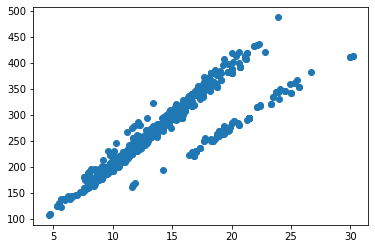

Showing chart for FUELCONSUMPTION_HWY


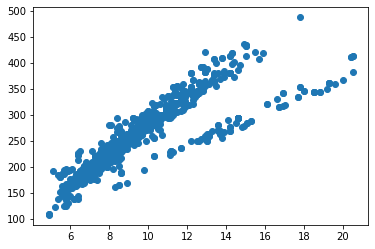

Showing chart for FUELCONSUMPTION_COMB


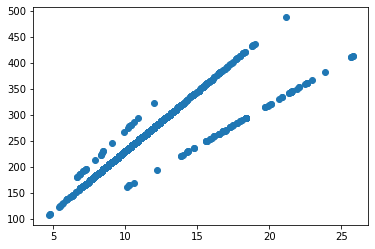

Showing chart for FUELCONSUMPTION_COMB_MPG


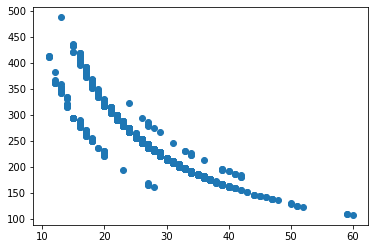

                          MODELYEAR  ENGINESIZE  CYLINDERS  \
CO2EMISSIONS                    NaN    0.874154   0.849685   
FUELCONSUMPTION_CITY            NaN    0.832225   0.796473   
FUELCONSUMPTION_COMB            NaN    0.819482   0.776788   
ENGINESIZE                      NaN    1.000000   0.934011   
FUELCONSUMPTION_HWY             NaN    0.778746   0.724594   
CYLINDERS                       NaN    0.934011   1.000000   
FUELCONSUMPTION_COMB_MPG        NaN   -0.808554  -0.770430   
MODELYEAR                       NaN         NaN        NaN   

                          FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
CO2EMISSIONS                          0.898039             0.861748   
FUELCONSUMPTION_CITY                  1.000000             0.965718   
FUELCONSUMPTION_COMB                  0.995542             0.985804   
ENGINESIZE                            0.832225             0.778746   
FUELCONSUMPTION_HWY                   0.965718             1.000000   
CYLINDERS      

'\nVariável mais correlacionada:\n\nFUELCONSUMPTION_CITY\n'

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import sklearn.metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv("FuelConsumptionCo2.csv")

'''
LETRA A
'''

for column in df.columns[0:-1]:
    print(f"Showing chart for {column}")
    plt.scatter(df[column], df["CO2EMISSIONS"])
    plt.show()

'''
LETRA B
'''

corr_matrix = df.corr().sort_values(by=['CO2EMISSIONS'], ascending=False)
print(corr_matrix)


'''
Variável mais correlacionada:

FUELCONSUMPTION_CITY
'''

**Realize a regressão linear simples com a variável selecionada no passo anterior. Use o pacote sklearn.**
- Separe os dados em treino e teste
- Ajuste o modelo no treino
- Imprima as métricas R2 score e a média dos resíduos ao quadrado (MSE) em ambos o treino e o teste.

In [ ]:
'''
LETRA C
'''

# Ordenando de acordo com a variável
df = df.sort_values(by="FUELCONSUMPTION_CITY")

# 95% Pra treino e 5% pra teste
PERCENTAGE_TRAIN_DATA = 0.95

x_train, x_test = train_test_split(df["FUELCONSUMPTION_CITY"], train_size=PERCENTAGE_TRAIN_DATA, shuffle=False)
y_train, y_test = train_test_split(df["CO2EMISSIONS"], train_size=PERCENTAGE_TRAIN_DATA, shuffle=False)

x_train = x_train.to_numpy().reshape(-1, 1)
x_test  = x_test.to_numpy().reshape(-1, 1)
y_train = y_train.to_numpy().reshape(-1, 1)
y_test  = y_test.to_numpy().reshape(-1, 1)

# Fazendo a predicao utilizando train_x e train_y
reg = LinearRegression().fit(x_train, y_train)

# Passando test_x para o modelo de regressao linear
prediction_test = reg.predict(x_test)
prediction_training = reg.predict(x_train)

r2_score_training = sklearn.metrics.r2_score(y_train, prediction_training)
print(f"R2 score in training = {r2_score_training}")

mse_score_training = sklearn.metrics.mean_squared_error(y_train, prediction_training)
print(f"MSE score in training = {mse_score_training}")

r2_score_testing = sklearn.metrics.r2_score(y_test, prediction_test)
print(f"R2 score in testing = {r2_score_testing}")

mse_score_testing = sklearn.metrics.mean_squared_error(y_test, prediction_test)
print(f"MSE score in testing = {mse_score_testing}")

# Montando o grafico
plt.scatter(x_train, y_train, c="orange", label = "Training Data")
plt.scatter(x_test, y_test, c="green", label="Test data")
plt.plot(x_test, prediction_test, c="red", label="Prediction")
plt.plot(x_train, prediction_training, c="blue", label="Train")
plt.legend()
plt.show()

**Plot o modelo resultante de seu treinamento**

In [ ]:
## plot o scatter da variável escolhida vs CO2
## plot o modelo (exemplo a seguir) 
##### plt.plot(train_x, reg_model.coef_[0][0]*train_x + reg_model.intercept_[0], '-r')

## Q2. Regressão polinomial

Para dados que não são linearmente separados, modelos polinomiais podem oferecer complexidade mais adequada. 

A função PolynomialFeatures() na biblioteca Scikit-learn pode nos ajudar nessa tarefa, já que ela gera uma matriz composta pelas combinações polinomiais das características do atributo. Por exemplo, digamos que o conjunto original tenha apenas um recurso, `ENGINESIZE`. Agora, se selecionarmos o grau do polinômio como 2, ele gerará 3 recursos, grau=0, grau=1 e grau=2.

**Realize a regressão polinomial a partir de `ENGINESIZE`**
- Extraia combinações polinomiais do atributo (experimente pelo menos dois diferentes graus de polinômio) 
- Alimente as características polimomias ao modelo de Regressão Linear

> Lembre-se de treinar em um conjunto e testar em outro. Meça a qualidade dos modelos produzidos em cada experimento. **Qual deles produziu a melhor resultado de teste?**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import sklearn.metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv("FuelConsumptionCo2.csv")

# Ordenando de acordo com a variável
df = df.sort_values(by="ENGINESIZE")

# 95% Pra treino e 5% para teste
PERCENTAGE_TRAIN_DATA = 0.95

x_train, x_test = train_test_split(df["ENGINESIZE"], train_size=PERCENTAGE_TRAIN_DATA, shuffle=False)
y_train, y_test = train_test_split(df["CO2EMISSIONS"], train_size=PERCENTAGE_TRAIN_DATA, shuffle=False)

x_train = x_train.to_numpy().reshape(-1, 1)
x_test  = x_test.to_numpy().reshape(-1, 1)
y_train = y_train.to_numpy().reshape(-1, 1)
y_test  = y_test.to_numpy().reshape(-1, 1)

'''
Teste mock sem utilizar PolynomialFeatures só pra ver o acerto do modelo de regressao linear normal
'''

reg = LinearRegression().fit(x_train, y_train)

prediction = reg.predict(x_test)

print("Métricas da regressao linear normal:")

my_r2_score = sklearn.metrics.r2_score(y_test, prediction)
print(f"R2 score utilizando só o modelo de regressão = {my_r2_score}")

my_mse_score = sklearn.metrics.mean_squared_error(y_test, prediction)
print(f"MSE score utilizando só o modelo de regressão = {my_mse_score}")

print("\n")

# Plotting chart
plt.scatter(x_train, y_train, c="orange", label = "Training Data")
plt.scatter(x_test, y_test, c="green", label="Test data")
plt.plot(x_test, prediction, c="red", label="Prediction")
plt.plot(x_train, reg.predict(x_train), c="blue", label="Train")
plt.legend()
plt.show()

'''
Primeiro teste com PolynomialFeatures
'''

# Utilizando grau = 2 para o primeiro teste
degree1 = 2

poly = PolynomialFeatures(degree=degree1)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Fazendo a predicao utilizando x_train e y_train
reg = LinearRegression().fit(x_train_poly, y_train)

# Passando x_test para o modelo de regressao linear
prediction = reg.predict(x_test_poly)

print(f"Métricas utilizando degree = {degree1}:")

my_r2_score = sklearn.metrics.r2_score(y_test, prediction)
print(f"R2 score com grau {degree1} = {my_r2_score}")

my_mse_score = sklearn.metrics.mean_squared_error(y_test, prediction)
print(f"MSE score com grau {degree1} = {my_mse_score}")

print("\n")

# Plotting chart
plt.scatter(x_train, y_train, c="orange", label = "Training Data")
plt.scatter(x_test, y_test, c="green", label="Test data")
plt.plot(x_test, prediction, c="red", label="Prediction")
plt.plot(x_train, reg.predict(x_train_poly), c="blue", label="Train")
plt.legend()
plt.show()

'''
Teste 2
'''

# Utilizando grau = 3 para o proximo teste
degree2 = 3

poly = PolynomialFeatures(degree2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly  = poly.transform(x_test)

# Fazendo a predicao utilizando x_train e y_train
reg = LinearRegression().fit(x_train_poly, y_train)

# Passando x_test para o modelo de regressao linear
prediction = reg.predict(x_test_poly)

print(f"Métricas utilizando degree = {degree2}:")

my_r2_score = sklearn.metrics.r2_score(y_test, prediction)
print(f"R2 score com grau {degree2} = {my_r2_score}")

my_mse_score = sklearn.metrics.mean_squared_error(y_test, prediction)
print(f"MSE score com grau {degree2} = {my_mse_score}")

print("\n")

# Plotting chart
plt.scatter(x_train, y_train, c="orange", label = "Training Data")
plt.scatter(x_test, y_test, c="green", label="Test data")
plt.plot(x_test, prediction, c="red", label="Prediction")
plt.plot(x_train, reg.predict(x_train_poly), c="blue", label="Train")
plt.legend()
plt.show()

'''
Teste 3
'''

# Utilizando grau = 4 para o proximo teste
degree3 = 4

poly = PolynomialFeatures(degree3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly  = poly.transform(x_test)

# Fazendo a predicao utilizando x_train e y_train
reg = LinearRegression().fit(x_train_poly, y_train)

# Passando x_test para o modelo de regressao linear
prediction = reg.predict(x_test_poly)

print(f"Métricas utilizando degree = {degree3}:")

my_r2_score = sklearn.metrics.r2_score(y_test, prediction)
print(f"R2 score com grau {degree3} = {my_r2_score}")

my_mse_score = sklearn.metrics.mean_squared_error(y_test, prediction)
print(f"MSE score com grau {degree3} = {my_mse_score}")

# Plotting chart
plt.scatter(x_train, y_train, c="orange", label = "Training Data")
plt.scatter(x_test, y_test, c="green", label="Test data")
plt.plot(x_test, prediction, c="red", label="Prediction")
plt.plot(x_train, reg.predict(x_train_poly), c="blue", label="Train")
plt.legend()
plt.show()

'''
A princípio o modelo parece não ter melhorado muito após o pré-processamento feito com PolynomialFeatures.
O r2_score e o MSE mudaram um pouco, mas ainda estão longe de valores bons.

A minha hipótese é que talvez seja o formato da distribuição dos dados em ENGINESIZE que esteja causando isso, porque os dados estão MUITO mais 
espalhados do que em outras variáveis do dataframe, o que indica que o número de outliers em ENGINESIZE deve ser muito alto. 
Ao meu ver, o resultado ruim não é uma fraqueza do modelo ou do pré-processamento, mas da variável ENGINESIZE que é uma péssima candidata para ser prevista, porque os dados
nela estão muito espalhados para fazer uma previsão precisa utilizando esses modelos :P
'''


## Q3. Regressão multivariada

Na realidade, existem múltiplas variáveis que impactam a emissão de co2. Quando mais de uma variável independente está presente, o processo é chamado de regressão linear múltipla. Um exemplo de regressão linear múltipla é prever a emissão de co2 usando os recursos `FUELCONSUMPTION_COMB`, `ENGINESIZE` e `CYLINDERS`. O bom aqui é que o modelo de regressão linear múltipla é a extensão do modelo de regressão linear simples.

**Realize a regressão multivariada com as seguintes variáveis**
- As três mencionadas no enunciado
- Substitua `FUELCONSUMPTION_COMB` por `FUELCONSUMPTION_CITY` e `FUELCONSUMPTION_HWY` 

> Lembre-se de treinar em um conjunto e testar em outro. Lembre-se que para cada experimento deve-se medir a qualidade dos modelos. Aproveite e reflita sobre o que pode ter afetado as diferenças na acurácia.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import sklearn.metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv("FuelConsumptionCo2.csv")

'''
LETRA A
'''

# Para ficar mais fácil de visualizar as relações entre as variáveis
'''
plt.scatter(df['FUELCONSUMPTION_COMB'], df['ENGINESIZE'], color='red')
plt.title('FUELCONSUMPTION_COMB Vs ENGINESIZE', fontsize=14)
plt.xlabel('ENGINESIZE', fontsize=14)
plt.ylabel('FUELCONSUMPTION_COMB', fontsize=14)
plt.grid(True)
plt.show()


plt.scatter(df['FUELCONSUMPTION_COMB'], df['CYLINDERS'], color='red')
plt.title('FUELCONSUMPTION_COMB Vs CYLINDERS', fontsize=14)
plt.xlabel('CYLINDERS', fontsize=14)
plt.ylabel('FUELCONSUMPTION_COMB', fontsize=14)
plt.grid(True)
plt.show()


plt.scatter(df['CYLINDERS'], df['ENGINESIZE'], color='red')
plt.title('CYLINDERS Vs ENGINESIZE', fontsize=14)
plt.xlabel('ENGINESIZE', fontsize=14)
plt.ylabel('CYLINDERS', fontsize=14)
plt.grid(True)
plt.show()
'''

# 95% Pra treino e 5% para teste
PERCENTAGE_TRAIN_DATA = 0.95

x_train, x_test = train_test_split(df[['FUELCONSUMPTION_COMB', 'ENGINESIZE', 'CYLINDERS']], train_size=PERCENTAGE_TRAIN_DATA, shuffle=False)
y_train, y_test = train_test_split(df["CO2EMISSIONS"], train_size=PERCENTAGE_TRAIN_DATA, shuffle=False)

reg = LinearRegression()
reg.fit(x_train, y_train)

prediction = reg.predict(x_test)

print("Métricas para predição com FUELCONSUMPTION_COMB, ENGINESIZE e CYLINDERS:")
my_r2_score = sklearn.metrics.r2_score(y_test, prediction)
print(f"R2 score = {my_r2_score}")

my_mse_score = sklearn.metrics.mean_squared_error(y_test, prediction)
print(f"MSE score = {my_mse_score}")

print("\n")

'''
LETRA B
'''

# Mais mapas para mostrar a relação entre as variáveis. FUELCONSUMPTION_CITY parece ser bem mais 
# correlatado a FUELCONSUMPTION_COMB do que FUELCONSUMPTION_HWY
'''
plt.scatter(df['FUELCONSUMPTION_CITY'], df['FUELCONSUMPTION_COMB'], color='red')
plt.title('FUELCONSUMPTION_CITY Vs FUELCONSUMPTION_COMB', fontsize=14)
plt.xlabel('FUELCONSUMPTION_COMB', fontsize=14)
plt.ylabel('FUELCONSUMPTION_CITY', fontsize=14)
plt.grid(True)
plt.show()


plt.scatter(df['FUELCONSUMPTION_HWY'], df['FUELCONSUMPTION_COMB'], color='red')
plt.title('FUELCONSUMPTION_HWY Vs FUELCONSUMPTION_COMB', fontsize=14)
plt.xlabel('FUELCONSUMPTION_COMB', fontsize=14)
plt.ylabel('FUELCONSUMPTION_HWY', fontsize=14)
plt.grid(True)
plt.show()
'''

# 95% Pra treino e 5% para teste
PERCENTAGE_TRAIN_DATA = 0.95

x_train, x_test = train_test_split(df[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'ENGINESIZE', 'CYLINDERS']], train_size=PERCENTAGE_TRAIN_DATA, shuffle=False)
y_train, y_test = train_test_split(df["CO2EMISSIONS"], train_size=PERCENTAGE_TRAIN_DATA, shuffle=False)

reg = LinearRegression()
reg.fit(x_train, y_train)

prediction = reg.predict(x_test)

print("Métricas para predição com FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY, ENGINESIZE e CYLINDERS:")

my_r2_score = sklearn.metrics.r2_score(y_test, prediction)
print(f"R2 score = {my_r2_score}")

my_mse_score = sklearn.metrics.mean_squared_error(y_test, prediction)
print(f"MSE score = {my_mse_score}")

'''
A acurácia do modelo era boa antes da separação, e após a separação continuou bem parecida. 
Isso se deve pela variável FUELCONSUMPTION_COMB ser uma combinacao de FUELCONSUMPTION_CITY e FUELCONSUMPTION_HWY, e é
possível ver isso nas imagens da parte de cima que mostram as comparações entre elas. São quase que linhas retas porque são
bem relacionadas, então na realidade trocar FUELCONSUMPTION_COMB por FUELCONSUMPTION_CITY e FUELCONSUMPTION_HWY dá quase
que na mesma coisa :P
'''